# 《一款高颜值的词云让我拍案叫绝》

本文首发于个人公众号【凹凸数据】，代码用于帮助大家理解文章内容，欢迎关注！



先导包：
pip3 install stylecloud

## 两行代码快速生成英文
一个小例子，以这里的`Trump.txt`为例，它是特朗普当选美国总统的演讲稿，直接生成词云。

In [1]:
# from stylecloud import gen_stylecloud
# gen_stylecloud(file_path='D:\Pandas\wuliu.txt') 

In [2]:
# #已生成词云图片，这里展示一下
# from IPython.display import Image 
# Image(filename='stylecloud.png')

## 整理评论数据

In [3]:
# 导包
import pandas as pd
import numpy as np
import re
import jieba

In [4]:
# 读取腾讯微博评论数据
df = pd.read_csv('tencent.csv', header=0,encoding='utf-8').astype(str)
#df.head()

In [5]:
def filter_str(desstr,restr=''):
    #过滤除中文以外的其他字符
    res = re.compile("[^\u4e00-\u9fa5^,^，^.^。^【^】^（^）^(^)^“^”^-^！^!^？^?^]")
    return res.sub(restr, desstr)

In [6]:
df['text'] = df['text'].apply(filter_str)
df.head()

,wid,time,text,uid,username,following,followed,gender
0,4521939799048363,Wed Jul 01 18:05:24 +0800 2020,今天下的雨，就是我为鹅厂流下的心疼的眼泪,6575359769,桃汁涧雾,651,215,f
1,4521937936302751,Wed Jul 01 17:58:00 +0800 2020,鹅不哭！......抱抱,2670390733,汪叽不解酒,1366,1122,f
2,4521941959283917,Wed Jul 01 18:13:59 +0800 2020,傻白鹅的人设是立住了哈哈...哈哈...哈哈...,5251834206,仙女本喵喵,933,158,f
3,4521938880455723,Wed Jul 01 18:01:44 +0800 2020,你这个憨憨腾讯公司腾讯公司其实，但是，一言难尽为了防止类似事件再次发生，欢迎广大网友踊跃提供...,1044254764,腾讯张军,560,79771,m
4,4521937965007292,Wed Jul 01 17:58:07 +0800 2020,傻鹅憨憨笑哈哈...笑哈哈...,3863398423,心愿您安好,247,55,f


## jieba分词

In [7]:
def get_cut_words(content_series):
    # 读入停用词表
    stop_words = [] 

    with open("stop_words.txt", 'r', encoding='utf-8') as f:
        lines = f.readlines()
        for line in lines:
            stop_words.append(line.strip())

    # 添加关键词
    my_words = ['老千妈', '傻白甜']      
    for i in my_words:
        jieba.add_word(i) 

    # 自定义停用词
    my_stop_words = []    
    stop_words.extend(my_stop_words)               

    # 分词
    word_num = jieba.lcut(content_series.str.cat(sep='。'), cut_all=False)

    # 条件筛选
    word_num_selected = [i for i in word_num if i not in stop_words and len(i)>=2]
    
    return word_num_selected

In [8]:
text1 = get_cut_words(content_series=df.text)
text1[:5] 

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\ADMINI~1\AppData\Local\Temp\jieba.cache
Loading model cost 1.537 seconds.
Prefix dict has been built successfully.


['今天', '为鹅厂', '流下', '心疼', '眼泪']

## 开始制作stylecloud 词云

### 自由挑选自己喜欢的蒙版
https://fontawesome.dashgame.com/

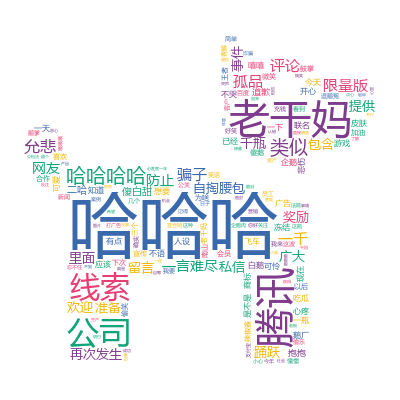

In [9]:
import stylecloud
from IPython.display import Image 

stylecloud.gen_stylecloud(text=' '.join(text1), collocations=False,
                          #palette='cartocolors.qualitative.Pastel_5',
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          #icon_name='fas fa-dragon',
                          icon_name='fas fa-dog',
                          #icon_name='fas fa-cat',
                          #icon_name='fas fa-dove',
                          size=400,
                          output_name='腾讯-词云.png')
Image(filename='腾讯-词云.png')

### 自由挑选自己的配色方案
https://jiffyclub.github.io/palettable/#matplotlib-color-cycle

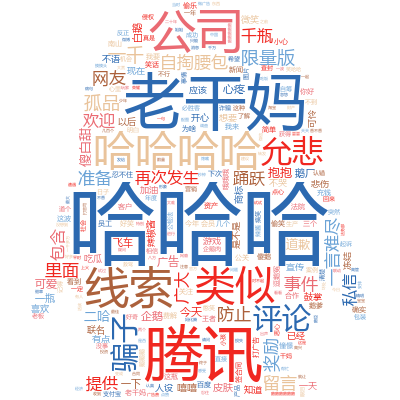

In [10]:
stylecloud.gen_stylecloud(text=' '.join(text1), collocations=False,
                          palette='tableau.BlueRed_6',
                          #palette='tableau.GreenOrange_12',
                          #palette='tableau.TrafficLight_9',
                          #palette='cartocolors.qualitative.Pastel_5',
                          #palette='cmocean.diverging.Delta_19',
                          #palette='matplotlib.Magma_8',
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fab fa-qq',size=400,
                          output_name='腾讯-词云.png')
Image(filename='腾讯-词云.png')

## 最后成品

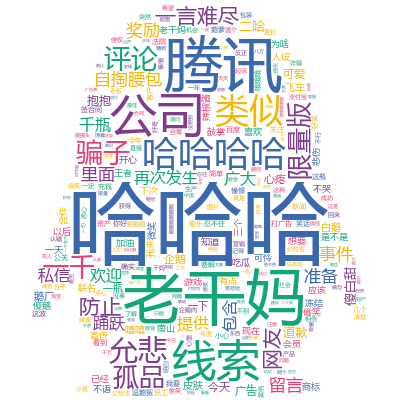

In [11]:
import stylecloud
from IPython.display import Image 

stylecloud.gen_stylecloud(text=' '.join(text1), collocations=False,
                          font_path=r'‪C:\Windows\Fonts\msyh.ttc',
                          icon_name='fab fa-qq',size=400,
                          output_name='腾讯-词云.png')
Image(filename='腾讯-词云.png')

## 关注我
个人公众号【凹凸数据】

提供爬虫、数据分析、可视化，一条龙服务！

业务范围：Python、SQL、Excel、Tableau······


![](https://img-blog.csdnimg.cn/20200627014848419.gif)